In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("fivethirtyeight")
import pandas as pd
from modules.table_scraper import table_scraper
import warnings
warnings.filterwarnings('ignore')


# SteamSpy Table Scraper
Two small examples for sales data from SteamSpy

# NieR Automata
- Releasedate: 17.March.2017
- AppId = 524220

In [2]:
%time df_nier = table_scraper(524220)

Wall time: 937 ms


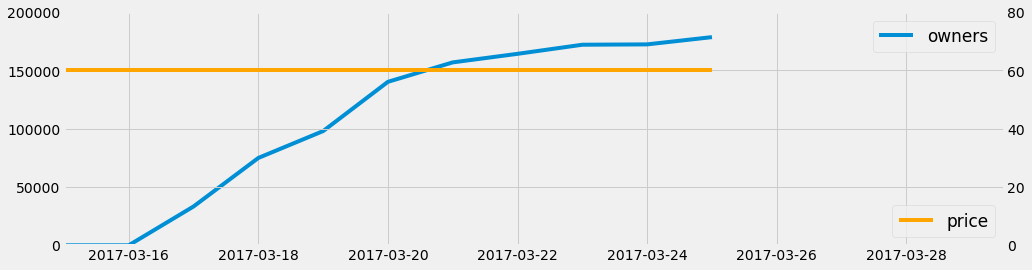

In [3]:
fig, ax1= plt.subplots(figsize=(15,4))


p1 = ax1.plot(df_nier["owners"],)
ax2 = ax1.twinx()
p2 = ax2.plot(df_nier["price"],color = "orange")


import matplotlib.ticker
nticks = 5
ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))


ax1.legend(loc = 0, fontsize = 17)
ax2.legend(loc = 4, fontsize = 17)

import datetime
ax1.set_xlim(datetime.date(2017,3,15))
ax1.set_ylim(0,200000)
ax2.set_ylim(0,80)



plt.show()

# Grand Theft Auto 5
- Steam ID = 271590
- Look at the effect of pricing/sales on the changes in owners

In [4]:
df_gtav = table_scraper(271590)
df_gtav.head(3)

,owners,changes,price,col3,event,url
date,,,,,,
2016-12-25,6088839,0,29.99,#2B6A94,a,a
2016-12-26,6143712,27437,29.99,a,a,a
2016-12-27,6192815,34659,29.99,a,a,a


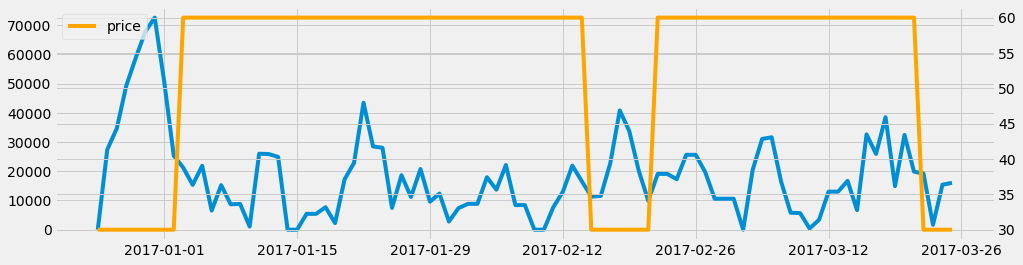

In [5]:
fig= plt.figure(figsize=(15,4))

ax1 = plt.subplot()
p1 = ax1.plot(df_gtav["changes"], label = "changes")

ax2 = ax1.twinx()
p2 = ax2.plot(df_gtav["price"],color = "orange", label = "price")

plt.legend()

plt.show()

### Correlation matrix for "changes" and "price"
- should be negative if lowering the price increases sales

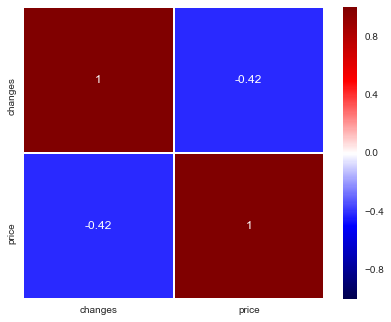

In [6]:
import seaborn as sns


f, ax = plt.subplots(figsize=(6, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


cmap=plt.get_cmap("seismic")

corr = df_gtav[["changes", "price"]].corr()

sns.heatmap(corr, cmap=cmap, vmax=1,vmin = -1,annot = True,
             linewidths=1, ax=ax)


plt.show()